<a href="https://colab.research.google.com/github/ucaokylong/facial_expression_with_fer2013_data/blob/main/fer_2013_EfficientNetB1_65e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/AI/fer_2013.zip

Streaming output truncated to the last 5000 lines.
 extracting: fer_2013/train/angry/Training_25806207.jpg  
 extracting: fer_2013/train/angry/Training_61140206.jpg  
 extracting: fer_2013/train/angry/Training_24737960.jpg  
 extracting: fer_2013/train/angry/Training_41062954.jpg  
 extracting: fer_2013/train/angry/Training_62704105.jpg  
 extracting: fer_2013/train/angry/Training_84772308.jpg  
 extracting: fer_2013/train/angry/Training_52788224.jpg  
 extracting: fer_2013/train/angry/Training_55923353.jpg  
 extracting: fer_2013/train/angry/Training_71282551.jpg  
 extracting: fer_2013/train/angry/Training_39764127.jpg  
 extracting: fer_2013/train/angry/Training_9436506.jpg  
 extracting: fer_2013/train/angry/Training_72989732.jpg  
 extracting: fer_2013/train/angry/Training_47170134.jpg  
 extracting: fer_2013/train/angry/Training_83320847.jpg  
 extracting: fer_2013/train/angry/Training_12513174.jpg  
 extracting: fer_2013/train/angry/Training_51002390.jpg  
 extracting: fer_2013/

In [3]:
!pip install tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully unin

In [4]:
fer2013_path = './fer_2013' # Đường dẫn đến folder dataset
train_fer2013_path = os.path.join(fer2013_path, 'train') # Đường dẫn đến folder dataset train
val_fer2013_path = os.path.join(fer2013_path, 'val') # Đường dẫn đến folder dataset val

BATCH_SIZE = 32
IMG_HEIGHT = 197
IMG_WIDTH = 197
RANDOM_SEED = 1

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_fer2013_path, # Đường dẫn đến bộ train
    seed=RANDOM_SEED, # Cài đặt random seed cho việc shuffle và các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    shuffle=True, # Bật chế độ shuffle dataset
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_fer2013_path, # Đường dẫn đến bộ val
    seed=RANDOM_SEED, # Cài đặt random seed cho các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset = -1)
])

In [6]:
base_model = tf.keras.applications.EfficientNetB1(input_shape = (197,197,3),
                                                  include_top = False,
                                                  weights = 'imagenet')

27018416/27018416 [==============================] - 3s 0us/step


In [7]:
print(len(base_model.layers))

# Freeze some layers
batch_norm_indices = [2, 4, 6, 9, 13, 14, 18, 21, 24, 26, 28, 31, 34, 38, 41, 43, 45, 46, 53, 56, 60, 63, 66, 70, 73,
                      76, 80, 83, 85, 87, 88, 92, 95, 98, 102, 105, 108, 110, 112, 115, 118, 120, 122, 125, 128, 132,
                      135, 138, 142, 145, 147, 149, 150, 152, 154, 157, 160, 164, 167, 170, 173, 176, 179, 180, 183,
                      185, 187, 190, 194, 198, 202, 205, 208, 210, 212, 215, 218, 220, 222, 225, 228, 232, 235, 238,
                      240, 242, 245, 249, 250, 254, 257, 260, 264, 267, 270, 273, 276, 280, 283, 287, 290, 294, 298,
                      302, 305, 308, 312, 315, 318, 322, 325, 328, 332, 335, 338]


340


In [8]:
for i in range(340):
    if i in batch_norm_indices:
        base_model.layers[i].trainable = False

print(len(base_model.layers))

340


In [9]:
global_max = tf.keras.layers.GlobalMaxPool2D()

prediction_layer = tf.keras.layers.Dense(7, activation = 'softmax' )

inputs =tf.keras.Input(shape = (197,197,3))
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.BatchNormalization()(x)
x = global_max(x)

x = tf.keras.layers.Dense(132, activation = 'relu')(x)
x = tf.keras.layers.Dense(132, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(8, activation = 'relu')(x)


outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 197, 197, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 197, 197, 3)       0         
                                                                 
 efficientnetb1 (Functional)  (None, 7, 7, 1280)       6575239   
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1280)       5120      
 ormalization)                                                   
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense_1 (Dense)             (None, 132)               169092

In [11]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu

train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

In [12]:
# Khai báo một số giá trị siêu tham số
input_shape = (IMG_HEIGHT, IMG_WIDTH)
EPOCHS = 65
LR = 1e-4

In [13]:
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import seaborn as sns
import tensorflow as tf

from keras.layers import *
from keras import models
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [14]:
# Cấu hình một số thông tin cho mô hình

lrd = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 4,verbose = 1,factor = 0.5, min_lr = 0.00001)
check_point = ModelCheckpoint('modelcp.h5', monitor = 'val_accuracy',
                              save_best_only= True, mode = 'auto')
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics = ['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

# Thực hiện huấn luyện
history = model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS, # Huấn luyện với số lần lặp = EPOCHS
    callbacks= [lrd, check_point]
)

model.save('EffB1-64bs-20ep.h5')

Epoch 1/65


898/898 [==============================] - ETA: 0s - loss: 1.9347 - accuracy: 0.1975

898/898 [==============================] - 174s 168ms/step - loss: 1.9347 - accuracy: 0.1975 - val_loss: 1.8855 - val_accuracy: 0.2095 - lr: 1.0000e-04
Epoch 2/65
898/898 [==============================] - 148s 164ms/step - loss: 1.8713 - accuracy: 0.2206 - val_loss: 1.8556 - val_accuracy: 0.2322 - lr: 1.0000e-04
Epoch 3/65
898/898 [==============================] - 146s 163ms/step - loss: 1.8467 - accuracy: 0.2239 - val_loss: 1.8073 - val_accuracy: 0.2379 - lr: 1.0000e-04
Epoch 4/65
898/898 [==============================] - 147s 164ms/step - loss: 1.8272 - accuracy: 0.2305 - val_loss: 1.8282 - val_accuracy: 0.2203 - lr: 1.0000e-04
Epoch 5/65
898/898 [==============================] - 147s 163ms/step - loss: 1.8137 - accuracy: 0.2402 - val_loss: 1.7650 - val_accuracy: 0.2743 - lr: 1.0000e-04
Epoch 6/65
898/898 [==============================] - 146s 163ms/step - loss: 1.7516 - accuracy: 0.2825 - val_loss: 1.6409 - val_accuracy: 0.3488 - lr: 1.0000e-04
Epoch 7/65
898/898 [=============

In [17]:
from google.colab import files
files.download('test_fer2013_EffB1.h5')

FileNotFoundError: ignored

Text(0.5, 0, 'epoch')

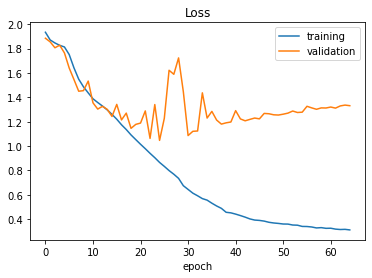

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

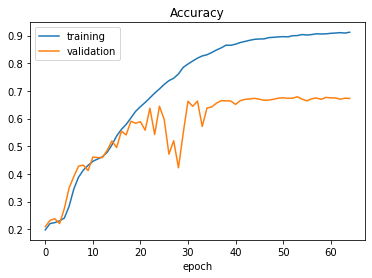

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')